Jacob Rowan

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math 
import random
import requests
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from pylab import rcParams
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from statsmodels.sandbox.regression.predstd import wls_prediction_std


rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

%matplotlib inline

In [3]:
readIndf = pd.read_csv("Assignment3DataSet.csv", usecols=(range(1,13)),  encoding='latin1')
#readIndf.drop(columns='')
kNNdf1 = readIndf.dropna(axis = 0, how = 'any')
kNNdf1.drop(columns = ['Urban population', 'Rural population'], inplace = True)


In [4]:
kNNdf1.head(5)

,Country name,year,Life Ladder,Rural population (% of total population),Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
12,Albania,2007,4.634252,51.098,48.902,4.379562,97.482517,2.517483,28.465694,58.14
13,Albania,2009,5.485470,48.924,51.076,3.175182,99.980777,0.019223,28.376643,63.24
14,Albania,2010,5.268937,47.837,52.163,2.554745,99.986786,0.013214,28.332116,65.23
15,Albania,2011,5.867422,46.753,53.247,2.700730,98.592221,1.407779,28.297081,67.81
16,Albania,2012,5.510124,45.670,54.330,2.806569,100.000000,0.000000,28.262044,69.96


In [5]:
#kNNdf = kNNdf1[(kNNdf1['Country name'] == 'Denmark') | (kNNdf1['Country name'] == 'Austria') | (kNNdf1['Country name'] == 'Switzerland') | (kNNdf1['Country name'] == 'Belgium') | (kNNdf1['Country name'] == 'Netherlands')]
kNNdf = kNNdf1[(kNNdf1['Country name'] == 'Egypt') | (kNNdf1['Country name'] == 'Nigeria') | (kNNdf1['Country name'] == 'South Africa') | (kNNdf1['Country name'] == 'Algeria') | (kNNdf1['Country name'] == 'Ethiopia') | (kNNdf1['Country name'] == 'Morocco')]

kNNdf.reset_index(drop=True, inplace = True)
#kNNtoPred.reset_index(drop=True, inplace = True)

In [6]:
kNNdf.head(5)

,Country name,year,Life Ladder,Rural population (% of total population),Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
0,Algeria,2010,5.463567,32.460,67.540,0.381654,0.380461,99.619539,0.805294,92.41
1,Algeria,2011,5.317194,31.764,68.236,0.385852,0.980009,99.019991,0.808485,92.49
2,Algeria,2012,5.604596,31.085,68.915,0.387952,1.083680,98.916320,0.811675,92.47
3,Algeria,2014,6.354898,29.779,70.221,0.407181,0.395380,99.604620,0.818057,93.10
4,Egypt,2005,5.167754,56.973,43.027,0.964388,11.633085,87.859049,0.067306,91.98


# Task 2

Is it possible to predict the rural population of a country based on the metrics in this dataset?

In [7]:
def scale(x, target_range):
    x_scaled = []
    
    #your code
    x_min = np.min(x)
    x_range = float(np.max(x) - np.min(x))
    
    for i in range(len(x)):
        x_scaled.append( (x[i] - x_min) / float(x_range) * (target_range[1] - target_range[0]) + target_range[0])
    
    return x_scaled

#The function below uses the above function to apply "scale" to all columns in a dataFrame
#df = The dataframe I want scaled
#colName = a list of the columns that are to be scaled, this need not be all the columns
#colList = list(df.columns.values.tolist()) -- To make a list of all column names in dataframe 'df'
#del colList[0:2] -- For this specific set this deletes 'country name' and 'year'
def scaleFrame(df, colName, sRange):
    newDf = df.copy()
    for y in colName:
        indx=0
        rowList = []
        for x, row in newDf.iterrows():
            rowList.append(row[y])
        scaledList = scale(rowList, sRange)
        for x, row in newDf.iterrows():
            newDf.at[x, y] = scaledList[indx]
            indx+=1
    return newDf

def calculate_regression_goodness_of_fit(ys, y_hat):
    ss_total = 0
    ss_residual = 0
    ss_regression = 0
    y_mean = y.mean()
    
    for i in range(len(ys)):
        ss_total += np.square(ys[i] - y_mean)
        ss_residual += np.square(ys[i] - y_hat[i])
        ss_regression += np.square(y_hat[i] - y_mean)
    
    r_square = ss_regression / ss_total
    rmse = np.sqrt( ss_residual / float(len(ys)) )
    
    return r_square[0], rmse[0]

def eucledean_distance(x, y):
    d = 0.0
    
    for i in range(len(x)):
        d += (x[i] - y[i])**2
    d = math.sqrt(d)
    
    return d


def kmeans_cluster(rows, distance = eucledean_distance, k = 3, iter = 10):
    
    # Determine the minimum and maximum values for each point
    ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows])) for i in range(len(rows[0]))]
    print(ranges)
    
    # Create k randomly placed centroids
    centroids=[[random.random( ) * (ranges[i][1] - ranges[i][0]) + ranges[i][0]  for i in range(len(rows[0]))] for j in range(k)]
    #centroids=[[0,0.9],[0.1,0.6],[0, 0.3]]
    print(centroids)
    
    prev_cluster_labels = None
    for t in range(iter):
        #print('Iteration %d' % t)
        cluster_labels = [[] for i in range(k)]
        #print(cluster_labels)
        # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row = rows[j]
            best_match = 0
            for i in range(k):
                d = distance(centroids[i],row)
                if d < distance(centroids[best_match],row): 
                    best_match=i
            cluster_labels[best_match].append(j)
            
        # If the results are the same as last time, this is complete
        if cluster_labels == prev_cluster_labels:
            break
        prev_cluster_labels = cluster_labels
    
        # Move the centroids to the average of their members
        for i in range(k):
            avgs = [0.0] * len(rows[0])
            if len(cluster_labels[i]) > 0:
                for rowid in cluster_labels[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m] += rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j] /= len(cluster_labels[i])
                centroids[i] = avgs
            
    return cluster_labels, centroids


In [8]:
colList = list(kNNdf.columns.values.tolist())
del colList[0:3]

scaledf = scaleFrame(kNNdf, ['Permanent cropland (% of land area)', 'Forest area (% of land area)','Electricity production from hydroelectric sources (% of total)'], [0,100])

#The independent variable is scaled here to make my 'classifications' Here these are percentile bands.
scaledf = scaleFrame(scaledf, ['Rural population (% of total population)'], [0,8])

scaledf.head(5)

,Country name,year,Life Ladder,Rural population (% of total population),Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
0,Algeria,2010,5.463567,0.411978,67.540,1.202481,0.057556,99.619539,5.837753,92.41
1,Algeria,2011,5.317194,0.305027,68.236,1.261954,0.675721,99.019991,5.862994,92.49
2,Algeria,2012,5.604596,0.200688,68.915,1.291691,0.782612,98.916320,5.888236,92.47
3,Algeria,2014,6.354898,0.000000,70.221,1.564079,0.072938,99.604620,5.938719,93.10
4,Egypt,2005,5.167754,4.178790,43.027,9.456916,11.659596,87.859049,0.000000,91.98


In [9]:
#Setting life ladder to int values, these will be my 'classes' for classification
scaledf['Rural population (% of total population)'] = scaledf['Rural population (% of total population)'].round()
scaledf.head(5)

,Country name,year,Life Ladder,Rural population (% of total population),Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
0,Algeria,2010,5.463567,0.0,67.540,1.202481,0.057556,99.619539,5.837753,92.41
1,Algeria,2011,5.317194,0.0,68.236,1.261954,0.675721,99.019991,5.862994,92.49
2,Algeria,2012,5.604596,0.0,68.915,1.291691,0.782612,98.916320,5.888236,92.47
3,Algeria,2014,6.354898,0.0,70.221,1.564079,0.072938,99.604620,5.938719,93.10
4,Egypt,2005,5.167754,4.0,43.027,9.456916,11.659596,87.859049,0.000000,91.98


In [10]:
X = scaledf[['Permanent cropland (% of land area)','Forest area (% of land area)','Electricity production from hydroelectric sources (% of total)']]
y = scaledf['Rural population (% of total population)']

In [11]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
X_new.shape

(41, 3)

In [12]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=1, test_size=0.2)
print("Test accuracy for knn (with feature selection):", knn.fit(X_train, y_train).score(X_test, y_test) )

print('knn \n',metrics.confusion_matrix(y_test, knn.predict(X_test)) )

Test accuracy for knn (with feature selection): 0.7777777777777778
knn 
 [[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]]


In [13]:
X_ger = scaledf[['Permanent cropland (% of land area)','Forest area (% of land area)','Electricity production from hydroelectric sources (% of total)', 'Country name']]
X_ger = X_ger[(X_ger['Country name'] == 'Nigeria')]
X_ger.drop(columns='Country name', inplace=True)
predResults = knn.predict(X_ger)
predResults

array([4., 4., 4., 4., 4., 4., 4., 4.])

In [14]:
predRes = scaledf[(scaledf['Country name'] == 'Nigeria')]
predRes.insert(4, 'Predicted Rural population', predResults)
predRes

,Country name,year,Life Ladder,Rural population (% of total population),Predicted Rural population,Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
23,Nigeria,2006,4.709746,5.0,4.0,39.943,92.223608,27.607637,72.899178,92.222073,1.57
24,Nigeria,2007,4.890419,5.0,4.0,40.819,95.334165,27.606618,72.900165,88.664542,1.72
25,Nigeria,2008,4.938560,4.0,4.0,41.702,95.334165,27.607717,72.899100,85.107020,1.96
26,Nigeria,2009,4.980220,4.0,4.0,42.588,100.000000,23.276720,77.099661,81.549490,2.19
27,Nigeria,2010,4.760276,4.0,4.0,43.480,100.000000,24.824828,75.598178,77.991967,2.44
28,Nigeria,2012,5.492954,4.0,4.0,45.246,100.000000,19.991077,80.286351,70.876915,3.09
29,Nigeria,2013,4.817869,4.0,4.0,46.118,96.889443,18.677789,81.560087,67.319393,3.48
30,Nigeria,2015,4.932915,3.0,4.0,47.838,96.889443,18.425400,81.804875,60.204340,4.39


In [15]:
#Here I turn the above process into a function
#df = The data set to be used
#colName = A list including the names of the columns to be used 
#dependent = The dependent variable
#indScale = The ratio to scale the columns too
#depScale = The ratio to scale the the dependent variable too. This will be the classifications use (% bands)

def predSet(df, colName, country, dependent, indScale, depScale):
    
    preddf = scaleFrame(df, colName, indScale)
    preddf = scaleFrame(preddf, dependent, depScale)
    preddf[dependent] = preddf[dependent].round()
    X = preddf[colName]
    y = preddf[dependent]
    X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
    knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=1, test_size=0.2)
    print("Test accuracy for knn (with feature selection):", knn.fit(X_train, y_train).score(X_test, y_test) )
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print('knn \n',metrics.confusion_matrix(y_test, knn.predict(X_test)) )
    print(metrics.classification_report(y_test, y_pred))
    
    
    colName.append("Country name")
    X_ger = preddf[colName]
    X_ger = X_ger[(X_ger['Country name'] == country)]
    X_ger.drop(columns='Country name', inplace=True)
    predResults = knn.predict(X_ger)
    

    
    predRes = preddf[(preddf['Country name'] == country)]
    colList = list(predRes.columns.values.tolist())
    depLoc = colList.index(dependent[0])
    predRes.insert(int(depLoc+1), 'Predicted ' +dependent[0] , predResults)
    return predRes

colName = ['Permanent cropland (% of land area)','Forest area (% of land area)','Electricity production from hydroelectric sources (% of total)']
x = predSet(kNNdf, colName, "Nigeria", ['Rural population (% of total population)'], [0,100], [0,8])
x

Test accuracy for knn (with feature selection): 0.7777777777777778
knn 
 [[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         1
         3.0       0.00      0.00      0.00         1
         4.0       0.33      1.00      0.50         1
         5.0       0.00      0.00      0.00         1
         8.0       1.00      1.00      1.00         1

   micro avg       0.78      0.78      0.78         9
   macro avg       0.62      0.71      0.64         9
weighted avg       0.70      0.78      0.72         9



,Country name,year,Life Ladder,Rural population (% of total population),Predicted Rural population (% of total population),Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
23,Nigeria,2006,4.709746,5.0,4.0,39.943,92.223608,27.607637,72.899178,92.222073,1.57
24,Nigeria,2007,4.890419,5.0,4.0,40.819,95.334165,27.606618,72.900165,88.664542,1.72
25,Nigeria,2008,4.938560,4.0,4.0,41.702,95.334165,27.607717,72.899100,85.107020,1.96
26,Nigeria,2009,4.980220,4.0,4.0,42.588,100.000000,23.276720,77.099661,81.549490,2.19
27,Nigeria,2010,4.760276,4.0,4.0,43.480,100.000000,24.824828,75.598178,77.991967,2.44
28,Nigeria,2012,5.492954,4.0,4.0,45.246,100.000000,19.991077,80.286351,70.876915,3.09
29,Nigeria,2013,4.817869,4.0,4.0,46.118,96.889443,18.677789,81.560087,67.319393,3.48
30,Nigeria,2015,4.932915,3.0,4.0,47.838,96.889443,18.425400,81.804875,60.204340,4.39


## Discussion

**Above is the selected model**

This was the model that most accuratly predicted the 
For the selected model the dependent variable was scaled from 0-8, this means that each classification denoted 12.5% (i.e 0 was the 0-12.5% 1 was 12.5-25%).<br>
All other values were scaled against eachother to ensure consistency.<br>

As shown in the output above, this model generates predictions of a scaled value with 77% accuracy.<br>
This shows that with the given training and testing data, the model predicted the classification (in this case the percentile band) in which the variable fell with 77% accuracy.<br>
The set used above was fairly small, with a larger less similar set it is likely to produce less accurate results than are displayed here.<br>
Due to the size of my set, the recall values here are not of much worth, it does show that a majority of the classifications for the testing data fell into the correct categroies. Despite this I do not believe that with a dataset of this size it provides much of worth to the analysis.<br>

I believe this model could be a good predictor for Rural populations in similar countries, however if provided with countries with significantly different environments and landscapes than those on which it was trained it may prove to be less accurate.<br>

Below are some of the other models that I attempted before settling on the above model.
- Nigeria is used as the country for consistency

In [37]:
colName = ['Access to clean fuels and technologies for cooking (% of population)','Electricity production from oil, gas and coal sources (% of total)','Electricity production from hydroelectric sources (% of total)']
x = predSet(kNNdf, colName, "Nigeria", ['Urban population (% of total population)'], [0,100], [0,8])
x

Test accuracy for knn (with feature selection): 0.6666666666666666
knn 
 [[1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         3.0       0.00      0.00      0.00         1
         4.0       0.25      1.00      0.40         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         2

   micro avg       0.67      0.67      0.67         9
   macro avg       0.46      0.57      0.49         9
weighted avg       0.58      0.67      0.60         9



,Country name,year,Life Ladder,Rural population (% of total population),Urban population (% of total population),Predicted Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
23,Nigeria,2006,4.709746,60.057,3.0,4.0,6.807427,27.607637,73.169098,11.725683,0.000000
24,Nigeria,2007,4.890419,59.181,3.0,4.0,7.027021,27.606618,73.170090,11.275953,0.156674
25,Nigeria,2008,4.938560,58.298,4.0,4.0,7.027021,27.607717,73.169020,10.826224,0.407353
26,Nigeria,2009,4.980220,57.412,4.0,4.0,7.356413,23.276720,77.386959,10.376494,0.647587
27,Nigeria,2010,4.760276,56.520,4.0,4.0,7.356413,24.824828,75.879264,9.926765,0.908711
28,Nigeria,2012,5.492954,54.754,4.0,4.0,7.356413,19.991077,80.586832,9.027306,1.587633
29,Nigeria,2013,4.817869,53.882,4.0,4.0,7.136818,18.677789,81.865837,8.577577,1.994986
30,Nigeria,2015,4.932915,52.162,5.0,4.0,7.136818,18.425400,82.111638,7.678119,2.945477


In [38]:
colName = ['Life Ladder','Access to clean fuels and technologies for cooking (% of population)','Electricity production from hydroelectric sources (% of total)']
x = predSet(kNNdf, colName, "Nigeria", ['Rural population (% of total population)'], [0,100], [0,8])
x

Test accuracy for knn (with feature selection): 0.6666666666666666
knn 
 [[2 0 0 0 0 0 0]
 [0 1 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      0.50      0.67         2
         2.0       1.00      1.00      1.00         1
         3.0       0.00      0.00      0.00         1
         4.0       0.25      1.00      0.40         1
         5.0       0.00      0.00      0.00         1
         8.0       1.00      1.00      1.00         1

   micro avg       0.67      0.67      0.67         9
   macro avg       0.61      0.64      0.58         9
weighted avg       0.69      0.67      0.64         9



,Country name,year,Life Ladder,Rural population (% of total population),Predicted Rural population (% of total population),Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
23,Nigeria,2006,41.168451,5.0,4.0,39.943,6.807427,27.607637,72.899178,11.725683,0.000000
24,Nigeria,2007,47.629437,5.0,4.0,40.819,7.027021,27.606618,72.900165,11.275953,0.156674
25,Nigeria,2008,49.350986,4.0,4.0,41.702,7.027021,27.607717,72.899100,10.826224,0.407353
26,Nigeria,2009,50.840764,4.0,4.0,42.588,7.356413,23.276720,77.099661,10.376494,0.647587
27,Nigeria,2010,42.975430,4.0,4.0,43.480,7.356413,24.824828,75.598178,9.926765,0.908711
28,Nigeria,2012,69.176408,4.0,4.0,45.246,7.356413,19.991077,80.286351,9.027306,1.587633
29,Nigeria,2013,45.034982,4.0,4.0,46.118,7.136818,18.677789,81.560087,8.577577,1.994986
30,Nigeria,2015,49.149090,3.0,4.0,47.838,7.136818,18.425400,81.804875,7.678119,2.945477


In [39]:
colName = ['Life Ladder','Forest area (% of land area)','Electricity production from hydroelectric sources (% of total)']
x = predSet(kNNdf, colName, "Nigeria", ['Urban population (% of total population)'], [0,100], [0,8])
x

Test accuracy for knn (with feature selection): 0.5555555555555556
knn 
 [[1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 2 0 0 0 0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         3.0       0.00      0.00      0.00         1
         4.0       0.25      1.00      0.40         1
         5.0       0.00      0.00      0.00         1
         6.0       1.00      1.00      1.00         1
         7.0       0.67      1.00      0.80         2
         8.0       0.00      0.00      0.00         2

   micro avg       0.56      0.56      0.56         9
   macro avg       0.42      0.57      0.46         9
weighted avg       0.40      0.56      0.44         9



,Country name,year,Life Ladder,Rural population (% of total population),Urban population (% of total population),Predicted Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
23,Nigeria,2006,41.168451,60.057,3.0,4.0,6.807427,27.607637,72.899178,92.222073,1.57
24,Nigeria,2007,47.629437,59.181,3.0,4.0,7.027021,27.606618,72.900165,88.664542,1.72
25,Nigeria,2008,49.350986,58.298,4.0,4.0,7.027021,27.607717,72.899100,85.107020,1.96
26,Nigeria,2009,50.840764,57.412,4.0,4.0,7.356413,23.276720,77.099661,81.549490,2.19
27,Nigeria,2010,42.975430,56.520,4.0,4.0,7.356413,24.824828,75.598178,77.991967,2.44
28,Nigeria,2012,69.176408,54.754,4.0,4.0,7.356413,19.991077,80.286351,70.876915,3.09
29,Nigeria,2013,45.034982,53.882,4.0,4.0,7.136818,18.677789,81.560087,67.319393,3.48
30,Nigeria,2015,49.149090,52.162,5.0,7.0,7.136818,18.425400,81.804875,60.204340,4.39


In [40]:
colName = ['Life Ladder','Forest area (% of land area)','Urban population (% of total population)']
x = predSet(kNNdf, colName, "Nigeria", ['Electricity production from hydroelectric sources (% of total)'], [0,100], [0,8])
x

Test accuracy for knn (with feature selection): 0.7777777777777778
knn 
 [[4 0 0 0]
 [1 0 1 0]
 [0 0 2 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       0.00      0.00      0.00         2
         2.0       0.67      1.00      0.80         2
         8.0       1.00      1.00      1.00         1

   micro avg       0.78      0.78      0.78         9
   macro avg       0.62      0.75      0.67         9
weighted avg       0.61      0.78      0.68         9



,Country name,year,Life Ladder,Rural population (% of total population),Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),Predicted Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
23,Nigeria,2006,41.168451,60.057,41.841302,6.807427,2.0,2.0,72.899178,92.222073,1.57
24,Nigeria,2007,47.629437,59.181,43.523943,7.027021,2.0,2.0,72.900165,88.664542,1.72
25,Nigeria,2008,49.350986,58.298,45.220030,7.027021,2.0,2.0,72.899100,85.107020,1.96
26,Nigeria,2009,50.840764,57.412,46.921880,7.356413,2.0,2.0,77.099661,81.549490,2.19
27,Nigeria,2010,42.975430,56.520,48.635255,7.356413,2.0,2.0,75.598178,77.991967,2.44
28,Nigeria,2012,69.176408,54.754,52.027429,7.356413,2.0,2.0,80.286351,70.876915,3.09
29,Nigeria,2013,45.034982,53.882,53.702388,7.136818,1.0,2.0,81.560087,67.319393,3.48
30,Nigeria,2015,49.149090,52.162,57.006204,7.136818,1.0,2.0,81.804875,60.204340,4.39


# Task 3

Using different metrics to predict Urban population<br>
Using Life Ladder, Access to clean fuels and technologies and Electricity production from oil, gas and coal sources (% of total)

For the following model the I decided to investigate what factors have an impact on urban population. <br>
I used countires all from a similar area in order to train a more accurate model, specifically in south east asia.<br>
I wanted primarily to use the 'Life ladder' metric, this time as a dependant variable, and investigate if there was any correlation between how happy a country was and how much of it's population lived in an urban setting.

In [20]:
kNNdf1.head(5)
task3df = kNNdf1[(kNNdf1['Country name'] == 'Singapore') | (kNNdf1['Country name'] == 'Philippines') | (kNNdf1['Country name'] == 'Indonesia') | (kNNdf1['Country name'] == 'Malaysia') | (kNNdf1['Country name'] == 'Vietnam') | (kNNdf1['Country name'] == 'Thailand') | (kNNdf1['Country name'] == 'Cambodia')]
#task3df = kNNdf1[(kNNdf1['year'] == 2015)]
task3df.reset_index(drop=True, inplace = True)

In [21]:
task3df.head(5)

,Country name,year,Life Ladder,Rural population (% of total population),Urban population (% of total population),Permanent cropland (% of land area),Electricity production from hydroelectric sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Access to clean fuels and technologies for cooking (% of population)
0,Cambodia,2006,3.568745,80.707,19.293,0.878087,4.325700,94.232400,60.070245,7.98
1,Cambodia,2007,4.155971,80.587,19.413,0.878087,3.351206,95.442359,59.348517,8.72
2,Cambodia,2008,4.462164,80.429,19.571,0.878087,3.103914,95.614035,58.626783,9.47
3,Cambodia,2009,4.110626,80.070,19.930,0.878087,3.712480,94.628752,57.905055,10.32
4,Cambodia,2010,4.141072,79.706,20.294,0.878087,3.200000,94.500000,57.183322,11.22


In [56]:
minmax_scale = preprocessing.MinMaxScaler().fit(task3df[['Life Ladder','Rural population (% of total population)','Urban population (% of total population)','Permanent cropland (% of land area)','Electricity production from hydroelectric sources (% of total)','Electricity production from oil, gas and coal sources (% of total)','Forest area (% of land area)','Access to clean fuels and technologies for cooking (% of population)']])
task3df[['Life Ladder','Rural population (% of total population)','Urban population (% of total population)','Permanent cropland (% of land area)','Electricity production from hydroelectric sources (% of total)','Electricity production from oil, gas and coal sources (% of total)','Forest area (% of land area)','Access to clean fuels and technologies for cooking (% of population)']] = minmax_scale.transform(task3df[['Life Ladder','Rural population (% of total population)','Urban population (% of total population)','Permanent cropland (% of land area)','Electricity production from hydroelectric sources (% of total)','Electricity production from oil, gas and coal sources (% of total)','Forest area (% of land area)','Access to clean fuels and technologies for cooking (% of population)']])
km = KMeans(n_clusters=5, init='random')

In [57]:
km.fit(task3df[['Life Ladder','Access to clean fuels and technologies for cooking (% of population)']].values)
predictions = km.predict(task3df[['Life Ladder','Access to clean fuels and technologies for cooking (% of population)']].values)

In [24]:
predictions

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [61]:
metrics.silhouette_score(task3df[['Life Ladder','Access to clean fuels and technologies for cooking (% of population)']].values, predictions)

0.584429469208165

Text(0.5, 1.0, 'Within Cluster Sum of Squares versus number of Clusters')

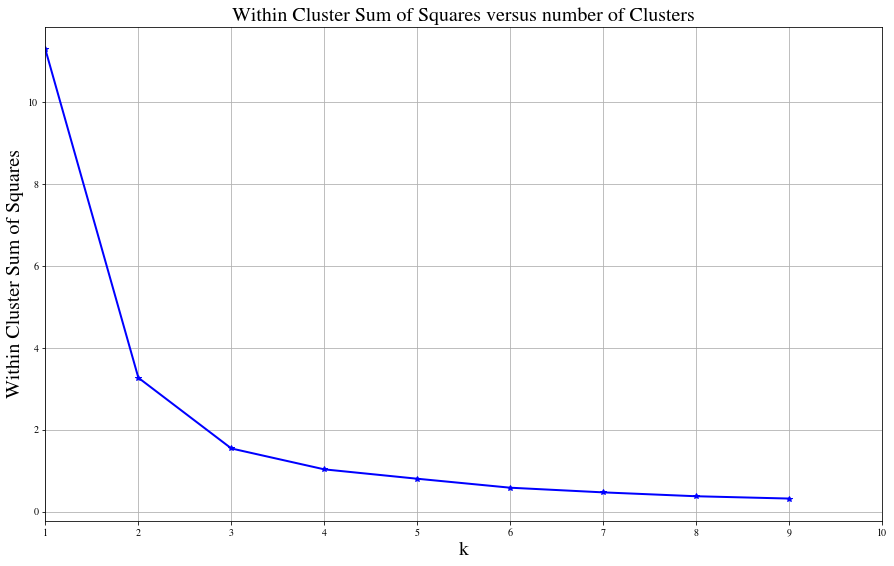

In [26]:
k_rng = range(1,10)
est = [KMeans(n_clusters = k).fit(task3df[['Life Ladder','Access to clean fuels and technologies for cooking (% of population)']].values) for k in k_rng]


within_cluster_sum_squares = [e.inertia_ for e in est]
fig, axes = plt.subplots()
fig.set_size_inches(15,20)

plt.subplot(212)
plt.plot(k_rng, within_cluster_sum_squares, 'b*-')
plt.xlim([1,10])
plt.grid(True)
plt.xlabel('k', fontsize=20)
plt.ylabel('Within Cluster Sum of Squares', fontsize=20)
plt.title('Within Cluster Sum of Squares versus number of Clusters', fontsize=20)

[(0.0, 1.0), (0.0, 1.0)]
[[0.8893567864367492, 0.7417842828991406], [0.8751807064082894, 0.5575413934210399], [0.3836122987895585, 0.8793431224181268], [0.12038521345942776, 0.7424025743998713]]


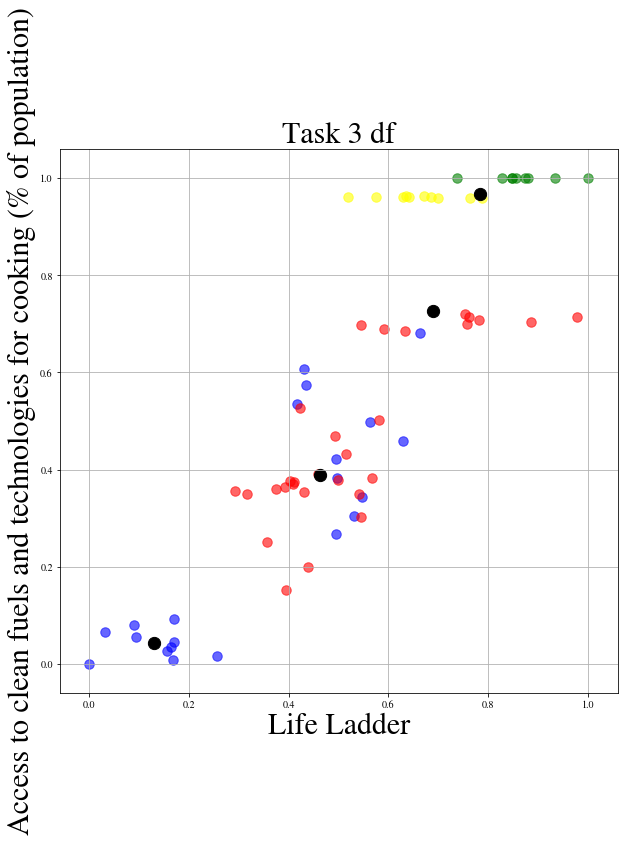

In [27]:
labels, centroids = kmeans_cluster(rows=task3df[['Life Ladder','Access to clean fuels and technologies for cooking (% of population)']].values,k = 4, iter = 5)
#print labels, centroids
fig, axes = plt.subplots()
fig.set_size_inches(10,10)


axes.set_xlabel('Life Ladder',fontsize=30)
axes.set_ylabel('Access to clean fuels and technologies for cooking (% of population)',fontsize=30)
plt.title('Task 3 df',fontsize=30)
axes.grid()


axes.scatter(task3df['Life Ladder'].where(task3df['Urban population (% of total population)']<=0.25), task3df['Access to clean fuels and technologies for cooking (% of population)'].where(task3df['Urban population (% of total population)']<=0.25), s=90, alpha=0.6, c='blue')
axes.scatter(task3df['Life Ladder'].where((task3df['Urban population (% of total population)']>0.25) & (task3df['Urban population (% of total population)']<=0.50)), task3df['Access to clean fuels and technologies for cooking (% of population)'].where((task3df['Urban population (% of total population)']>0.25) & (task3df['Urban population (% of total population)']<=0.50)), s=90, alpha=0.6, c='red')
axes.scatter(task3df['Life Ladder'].where((task3df['Urban population (% of total population)']>0.50) & (task3df['Urban population (% of total population)']<0.75)), task3df['Access to clean fuels and technologies for cooking (% of population)'].where((task3df['Urban population (% of total population)']>0.50) & (task3df['Urban population (% of total population)']<0.75)), s=90, alpha=0.6, c='yellow')
axes.scatter(task3df['Life Ladder'].where(task3df['Urban population (% of total population)']>=0.75), task3df['Access to clean fuels and technologies for cooking (% of population)'].where(task3df['Urban population (% of total population)']>=0.75), s=90, alpha=0.6, c='green')


axes.scatter(centroids[0][0],centroids[0][1], s=150, alpha=1, c='black')
axes.scatter(centroids[1][0], centroids[1][1], s=150, alpha=1, c='black')
axes.scatter(centroids[2][0], centroids[2][1], s=150, alpha=1, c='black')
axes.scatter(centroids[3][0], centroids[3][1], s=150, alpha=1, c='black')

plt.show()

Blue represents lower 25% of Urban population (% of total population)
Red represents 25-50% 
Yellow represents 50-75%
Green represents 75-100%

**Observations and discussion**

There are 4 observable clusters in the above diagram, with the upper two clusters being 'Bands', this is explored more below.<br>
As there were four observable clusters, I designated a k value of 4.<br>

Interpretations of the graph are as follows <br>
The Y axis here (Access to clean fuels and technologies for cooking) was more important in defining clusters in this set.

Countries with less access to clean fuels and technologies tend to be less happy
- This could be due to a lower quality of living amongst the general populous
- A country with less access to clean cooking and fuel technologies may have less accurate survey results than more developed countries

Once a country hits a certain threshold of access to clean fuels and technologies for cooking, it no longer seems to affect happiness
- The upper two 'clusters' both have the consistent access to clean fuels, which could indicate that these bands (green/yellow) two different countries with higher access to clean fuels.
- The alterations in life ladder are likely unrelated to the metrics explored above

Countries with higher Urban populations tend to be both happier, and have better access to clean fuels
- The clusters show fairly evident seperation from eachother
- The countries with higher urban population showed higher results for both metrics
- Fairly clear trends are observable above


In [28]:
markerList = ['o','^','1','s','P','x']
countryName= list(task3df['Country name'].unique().tolist())
markDict = zip(countryName, markerList)
markDict = dict(markDict)


[(0.0, 1.0), (0.0, 1.0)]
[[0.9398449554696235, 0.8384417761958836], [0.8682089076271494, 0.35075629908827544], [0.7590338434131607, 0.8957890181868052], [0.7124015106412986, 0.6964873640889807]]


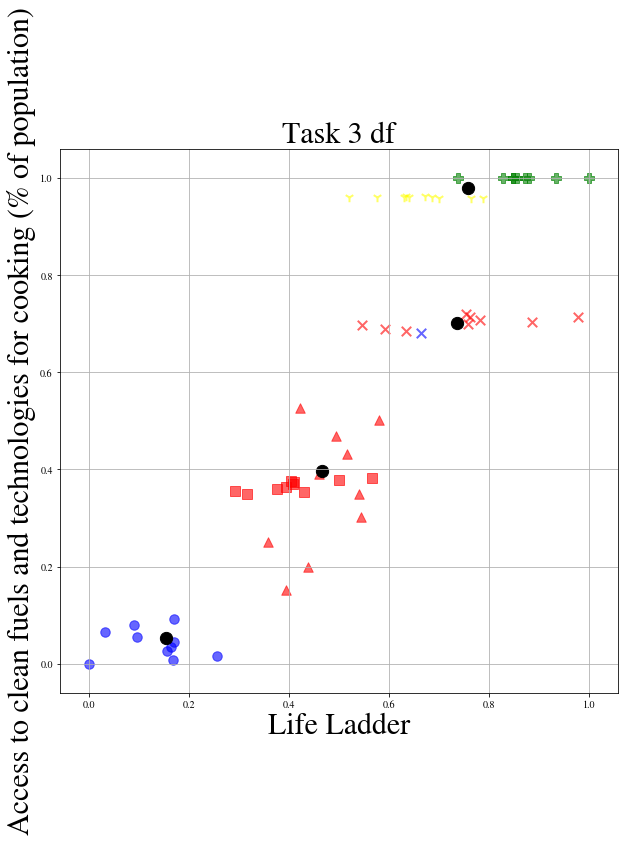

In [29]:
labels, centroids = kmeans_cluster(rows=task3df[['Life Ladder','Access to clean fuels and technologies for cooking (% of population)']].values,k = 4, iter = 5)
#print labels, centroids
fig, axes = plt.subplots()
fig.set_size_inches(10,10)


axes.set_xlabel('Life Ladder',fontsize=30)
axes.set_ylabel('Access to clean fuels and technologies for cooking (% of population)',fontsize=30)
plt.title('Task 3 df',fontsize=30)
axes.grid()

for mark in markDict:
    fr = task3df[task3df['Country name'] == mark]
    axes.scatter(fr['Life Ladder'].where(fr['Urban population (% of total population)']<=0.25), fr['Access to clean fuels and technologies for cooking (% of population)'].where(fr['Urban population (% of total population)']<=0.25), s=90, alpha=0.6, c='blue', marker=markDict[mark])
    axes.scatter(fr['Life Ladder'].where((fr['Urban population (% of total population)']>0.25) & (fr['Urban population (% of total population)']<=0.50)), fr['Access to clean fuels and technologies for cooking (% of population)'].where((fr['Urban population (% of total population)']>0.25) & (fr['Urban population (% of total population)']<=0.50)), s=90, alpha=0.6, c='red', marker=markDict[mark])
    axes.scatter(fr['Life Ladder'].where((fr['Urban population (% of total population)']>0.50) & (fr['Urban population (% of total population)']<0.75)), fr['Access to clean fuels and technologies for cooking (% of population)'].where((fr['Urban population (% of total population)']>0.50) & (fr['Urban population (% of total population)']<0.75)), s=90, alpha=0.6, c='yellow', marker=markDict[mark])
    axes.scatter(fr['Life Ladder'].where(fr['Urban population (% of total population)']>=0.75), fr['Access to clean fuels and technologies for cooking (% of population)'].where(fr['Urban population (% of total population)']>=0.75), s=90, alpha=0.6, c='green', marker=markDict[mark])


axes.scatter(centroids[0][0],centroids[0][1], s=150, alpha=1, c='black')
axes.scatter(centroids[1][0], centroids[1][1], s=150, alpha=1, c='black')
axes.scatter(centroids[2][0], centroids[2][1], s=150, alpha=1, c='black')
axes.scatter(centroids[3][0], centroids[3][1], s=150, alpha=1, c='black')

plt.show()

**Not part of official report** <br>

Above I added another graph I created that changed the shape of the marker based on which country the data was from.<br>
I made it as I thought it might be of good value to my analysis, after seeing the graph I thought it was hard to follow and meant there was too much clutter in the graph.<br>
I left it in because I thought it was a neat idea :)

In [52]:
km = KMeans(n_clusters=5, init='random')
km.fit(task3df[['Life Ladder','Forest area (% of land area)']].values)
predictions = km.predict(task3df[['Life Ladder','Forest area (% of land area)']].values)
metrics.silhouette_score(task3df[['Life Ladder','Forest area (% of land area)']].values, predictions)

0.6392569114652142

Text(0.5, 1.0, 'Within Cluster Sum of Squares versus number of Clusters')

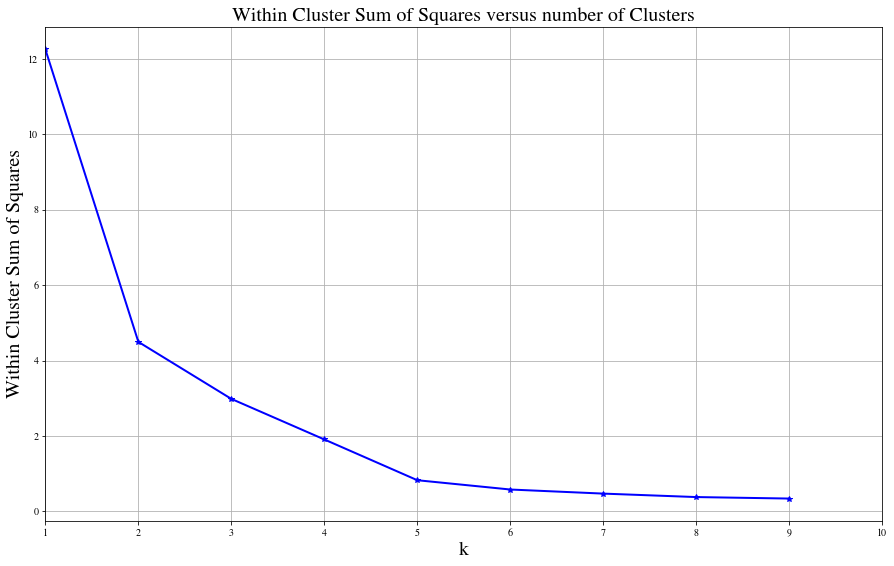

In [31]:
k_rng = range(1,10)
est = [KMeans(n_clusters = k).fit(task3df[['Life Ladder','Forest area (% of land area)']].values) for k in k_rng]


within_cluster_sum_squares = [e.inertia_ for e in est]
fig, axes = plt.subplots()
fig.set_size_inches(15,20)

plt.subplot(212)
plt.plot(k_rng, within_cluster_sum_squares, 'b*-')
plt.xlim([1,10])
plt.grid(True)
plt.xlabel('k', fontsize=20)
plt.ylabel('Within Cluster Sum of Squares', fontsize=20)
plt.title('Within Cluster Sum of Squares versus number of Clusters', fontsize=20)

A higher K seems to stop providing a meaningful difference at 5-6. As such this is the value I will use as my k value in my cluster analysis.

[(0.0, 1.0), (0.0, 0.9999999999999999)]
[[0.005301811087416897, 0.876802826202781], [0.27652544889758857, 0.1799540235161072], [0.8809450886134389, 0.030897604234242034], [0.564637837208028, 0.33867140551189695], [0.23398662236099388, 0.7061616073430526]]


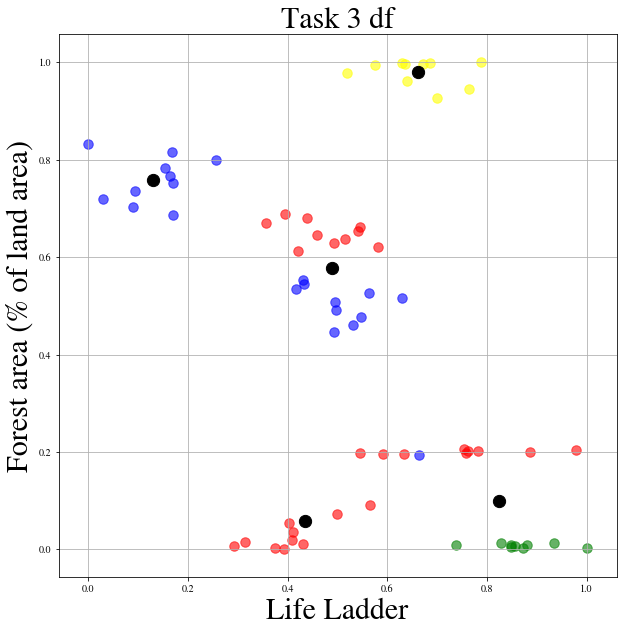

In [41]:
labels, centroids = kmeans_cluster(rows=task3df[['Life Ladder','Forest area (% of land area)']].values,k = 5, iter = 5)
#print labels, centroids
fig, axes = plt.subplots()
fig.set_size_inches(10,10)

axes.set_xlabel('Life Ladder',fontsize=30)
axes.set_ylabel('Forest area (% of land area)',fontsize=30)
plt.title('Task 3 df',fontsize=30)
axes.grid()

    
axes.scatter(task3df['Life Ladder'].where(task3df['Urban population (% of total population)']<=0.25), task3df['Forest area (% of land area)'].where(task3df['Urban population (% of total population)']<=0.25), s=90, alpha=0.6, c='blue')
axes.scatter(task3df['Life Ladder'].where((task3df['Urban population (% of total population)']>0.25) & (task3df['Urban population (% of total population)']<=0.50)), task3df['Forest area (% of land area)'].where((task3df['Urban population (% of total population)']>0.25) & (task3df['Urban population (% of total population)']<=0.50)), s=90, alpha=0.6, c='red')
axes.scatter(task3df['Life Ladder'].where((task3df['Urban population (% of total population)']>0.50) & (task3df['Urban population (% of total population)']<0.75)), task3df['Forest area (% of land area)'].where((task3df['Urban population (% of total population)']>0.50) & (task3df['Urban population (% of total population)']<0.75)), s=90, alpha=0.6, c='yellow')
axes.scatter(task3df['Life Ladder'].where(task3df['Urban population (% of total population)']>=0.75), task3df['Forest area (% of land area)'].where(task3df['Urban population (% of total population)']>=0.75), s=90, alpha=0.6, c='green')


axes.scatter(centroids[0][0],centroids[0][1], s=150, alpha=1, c='black')
axes.scatter(centroids[1][0], centroids[1][1], s=150, alpha=1, c='black')
axes.scatter(centroids[2][0], centroids[2][1], s=150, alpha=1, c='black')
axes.scatter(centroids[3][0], centroids[3][1], s=150, alpha=1, c='black')
axes.scatter(centroids[4][0], centroids[4][1], s=150, alpha=1, c='black')

plt.show()

Looking at the above graph is is aparent that my initial prediction of a K value of 5 is suitable (there being 5 clusters, potentially 6 depending on how the clusters are seperated.<br>
Although there appears to be good varied distribution of my variables on the graph above, it does not appear as if the % area of forest in a country has any meaningful impact on the ladder score of a country.<br>
This is shown in there being distinct clusters with both high relative areas of forest, and high ladder scores, as well as almost no forest area, as well as high happiness. It is more likely that this is dependent on country rather the variables explored. The centroids consistently find good central clusters, though this model and graph are of low worth.

The models below were other models that I explored.

In [33]:
km = KMeans(n_clusters=5, init='random')
km.fit(task3df[['Permanent cropland (% of land area)','Access to clean fuels and technologies for cooking (% of population)']].values)
predictions = km.predict(task3df[['Permanent cropland (% of land area)','Access to clean fuels and technologies for cooking (% of population)']].values)
metrics.silhouette_score(task3df[['Permanent cropland (% of land area)','Access to clean fuels and technologies for cooking (% of population)']].values, predictions)

0.724218501865934

In [34]:
km = KMeans(n_clusters=5, init='random')
km.fit(task3df[['Permanent cropland (% of land area)','Forest area (% of land area)']].values)
predictions = km.predict(task3df[['Permanent cropland (% of land area)','Forest area (% of land area)']].values)
metrics.silhouette_score(task3df[['Permanent cropland (% of land area)','Forest area (% of land area)']].values, predictions)

0.7552856337434304

In [35]:
km = KMeans(n_clusters=5, init='random')
km.fit(task3df[['Life Ladder','Electricity production from hydroelectric sources (% of total)']].values)
predictions = km.predict(task3df[['Life Ladder','Electricity production from hydroelectric sources (% of total)']].values)
metrics.silhouette_score(task3df[['Life Ladder','Electricity production from hydroelectric sources (% of total)']].values, predictions)

0.5070539758288696

In [36]:
km = KMeans(n_clusters=5, init='random')
km.fit(task3df[['Life Ladder','Forest area (% of land area)']].values)
predictions = km.predict(task3df[['Life Ladder','Forest area (% of land area)']].values)
metrics.silhouette_score(task3df[['Life Ladder','Forest area (% of land area)']].values, predictions)


0.6392569114652149

## Discussion

The first of the two graphs created showed a stronger representation of the data trends. <br>
The centroids when randomised consistently localised to meaningful data points, that well indicated the means of the clusters. The models displayed directly above were other models that I initially investigated but decided not to use in as models in my final reports. This was because I thought the data displayed in my initial cluster model (Access to fuel vs life ladder) showed more interesting trends, and better adressed the themes I have investigated in both reports.<br>

The clusters displayed show a fairly clear relationship between all 3 variables when a country has lower happiness. <br>
This again is evident, as the idea that a country with limited access to fuels (be it electrical or gas) could logically be assumed to have a lower standard of living, a harder lifestyle and thereby be less happy. Though this is just the speculation of a mid twenties individual with a significantly more priviledged upbringing than those in such situations. <br>